# Boston housing data를 활용한 데이터탐색 및 주택가격 예측  

## Boston housing data

| 변수명 | 변수설명 | 
| :-: | :-: | 
|CRIM | 지역별 범죄 발생률 |
|ZN | 25,000평방피트를 초과하는 거주 지역의 비율 |
|INDUS | 비상업 지역 넓이 비율 |
|CHAS | 찰스강에 대한 가변수 (강 경계위치하면 1, 아니면 0) |
|NOX | 일산화질소 농도 |
|RM | 방의 개수 |
|AGE | 1940년 이전에 건축된 자가 주택의 비율 |
|DIS | 보스턴 5개 고용센터까지의 거리 | 
|RAD | 고속도로 접근성 |
|TAX | 10,000달러 당 재산세 비율 |
|PTRATIO | 교사와 학생의 비율 |
|B | 흑인의 비율 | 
|LSTAT | 하위계층의 비율 |
|MEDV | 자가 주택 가격(중위수값), 단위 = $1000|

- MEDV이 관심 변수 

In [1]:
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

# boston housing data 준비 
from sklearn.datasets import load_boston
import pandas as pd
tmp = load_boston()
# 독립변수들
boston = pd.DataFrame(tmp.data, columns = tmp.feature_names)

In [2]:
# target 변수를 boston 데이터프레임에 추가
boston['medv'] = tmp.target 

In [3]:
boston.shape

(506, 14)

In [4]:
boston.head() # 13개의 독립변수

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
medv       0
dtype: int64

- 기초통계량 계산 

In [6]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


- CHAS는 범주형 자료

In [7]:
boston.CHAS.value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

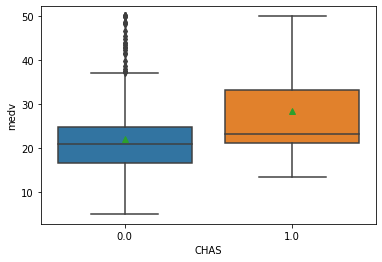

In [8]:
sns.boxplot(data=boston, x='CHAS', y='medv', showmeans=True)
plt.show()

- 찰스강 경계에 위치한 주택의 평균은 찰스강 경계에 위치하지 않은 주택의 평균보다 통계적으로 유의하게 큰지에 대한 검정  
- (단측검정) $H_0$ : $\mu_0 =\mu_1$, $H_1$ : $\mu_0 < \mu_1$ 

- T-test 검정절차 : 
    - [step 1] : 두 집단의 **모분산**이 동일한지에 관한 검정
    - [step 2] : **모평균**에 대한 **T-test** 시행 : 분산이 동일한지 아닌지 여부에 따라 ttest 함수의 옵션이 달라짐

In [9]:
# CHAS 에 따라 데이터셋 분리 
chas0 = boston.loc[boston.CHAS == 0, 'medv']
chas1 = boston.loc[boston.CHAS == 1, 'medv']

In [10]:
from scipy import stats

# [step 1] 두 집단의 모분산이 동일한가를 검정하는 bartlett test
s, p = stats.bartlett(chas0, chas1)
print('p-value : %.4f' % p)

p-value : 0.0120


- (등분산성 검정) $H_0$ : 등분산 / $H_1$ : 등분산 아님 
    - 결과 : p-value < $\alpha$ (0.05). 따라서 $H_0$ 기각
    - 해석 : $H_0$ 기각되므로 분산이 다르다고 할 수 있다. 

In [11]:
# [step 2] T-test 
s, p = stats.ttest_ind(chas0, chas1, equal_var=False) 
p2 = p/2
print('p-value : %.4f' % p2)

p-value : 0.0018


- **(단측 검정)**
    - 결과 : p-value < $\alpha$ (0.05). 따라서 $H_0$ 기각
    - 해석 : 찰스강 경계에 위치한 주택의 평균은 찰스강 경계에 위치하지 않은 주택의 평균보다 통계적으로 유의하게 크다고 할 수 있다. 

- 주택가격 medv를 다른 변수들에 포함된 정보를 활용하여 관계식을 구하고 추후 예측에 활용해보고자 함 
- 주택가격 medv의 분포

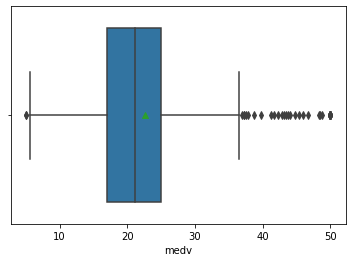

In [12]:
sns.boxplot(data=boston, x='medv', showmeans=True)
plt.show()

In [13]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf 

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


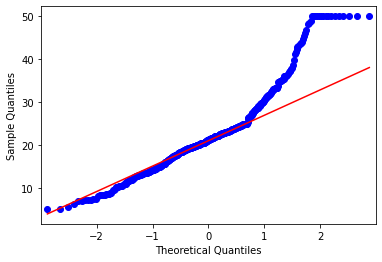

In [14]:
sm.qqplot(boston.medv, line='q')
plt.show()

- 독립변수(X)들과 종속변수(Y)의 관계 탐색

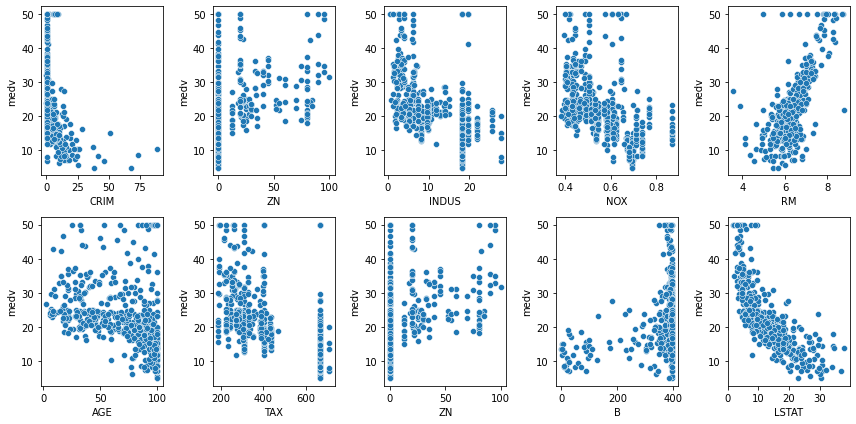

In [15]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))

sns.scatterplot(x='CRIM', y='medv', data=boston, ax=axs[0,0])
sns.scatterplot(x='ZN', y='medv', data=boston, ax=axs[0,1])
sns.scatterplot(x='INDUS', y='medv', data=boston, ax=axs[0,2])
sns.scatterplot(x='NOX', y='medv', data=boston, ax=axs[0,3])
sns.scatterplot(x='RM', y='medv', data=boston, ax=axs[0,4])
sns.scatterplot(x='AGE', y='medv', data=boston, ax=axs[1,0])
sns.scatterplot(x='TAX', y='medv', data=boston, ax=axs[1,1])
sns.scatterplot(x='ZN', y='medv', data=boston, ax=axs[1,2])
sns.scatterplot(x='B', y='medv', data=boston, ax=axs[1,3])
sns.scatterplot(x='LSTAT', y='medv', data=boston, ax=axs[1,4])

fig.tight_layout() 
plt.show()

- 상관분석 : 독립변수와 종속변수, 독립변수들 간의 관계를 미리 탐색 

In [16]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [17]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf 

- 자료에 포함된 모든 변수를 독립변수(X)로 포함하고 medv를 종속변수(Y)로 하는 회귀모형

In [18]:
m1 = smf.ols(formula = 'medv ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', data=boston).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 29 Jul 2022   Prob (F-statistic):          6.72e-135
Time:                        08:49:50   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- 통계적으로 유의하지 않은 회귀계수를 가진 INDUS, AGE 제거한 모형 

In [19]:
f2 = smf.ols(formula = 'medv ~ CRIM + ZN + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT', data=boston)
m2 = f2.fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Fri, 29 Jul 2022   Prob (F-statistic):          5.54e-137
Time:                        08:52:06   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$\Rightarrow \hat{medv} = 36.34 - 0.11 CRIM + 0.05 ZN + 2.72 CHAS - 17.38 NOX + 3.80 RM - 1.49 DIS + 0.30 RAD - 0.01 TAX - 0.95 PTRATIO + 0.01 B -0.52 LSTAT$
- (다른 독립변수들이 고정되어 있다고 가정했을 때) 회귀계수 해석
    - CRIM 해석 : 지역별 범죄 발생율이 1 증가할 때 주택가격은 0.11만큼 감소
    - CHAS 해석 : 찰스강에 경계에 위치한 경우는 아닌 경우보다 2.72만큼 주택가격이 높음 
    - RM 해석 : 방의 개수가 1 증가할 때 주택가격은 3.80만큼 증가 
    - LSTAT 해석 : 하위계층의 비중이 1 증가할 때 주택가격은 0.52만큼 감소 

- 잔차 $=y - \hat{y}$

In [20]:
m2.resid

0      -6.124281
1      -3.396528
2       4.166630
3       4.752005
4       8.217359
         ...    
501    -1.137900
502    -1.780817
503    -3.709999
504    -4.111333
505   -10.440843
Length: 506, dtype: float64

- 표준화 잔차 (standardized residuals) 
    - 정규분포 위반 여부 진단
    - 절대값 2.5를 넘으면 이상치라 판단 

In [21]:
influence = m2.get_influence()
standardized_residuals = influence.resid_studentized_internal

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


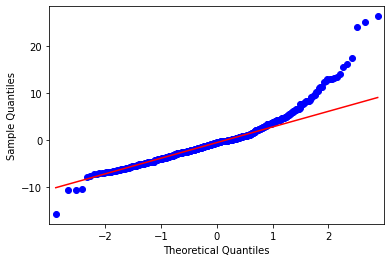

In [23]:
%matplotlib inline
# 정규 qqplot 
sm.qqplot(m2.resid, line='q')
plt.show()

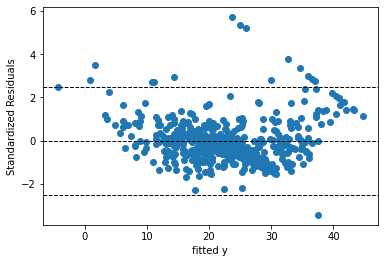

In [24]:
plt.scatter(m2.fittedvalues, standardized_residuals)
plt.xlabel('fitted y')
plt.ylabel('Standardized Residuals')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.axhline(y=2.5, color='black', linestyle='--', linewidth=1)
plt.axhline(y=-2.5, color='black', linestyle='--', linewidth=1)
plt.show()

In [25]:
tf = abs(standardized_residuals) > 2.5
sum(tf)

15

In [26]:
boston_sub = boston.loc[~tf, :]
boston_sub.shape

(491, 14)

- 이상치를 제거하고 다시 회귀모형 적합 

In [27]:
f3 = smf.ols(formula = 'medv ~ CRIM + ZN + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT', data=boston_sub)
m3 = f3.fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     212.8
Date:                Fri, 29 Jul 2022   Prob (F-statistic):          1.78e-176
Time:                        08:59:12   Log-Likelihood:                -1316.1
No. Observations:                 491   AIC:                             2656.
Df Residuals:                     479   BIC:                             2707.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.8631      4.196      4.257      0.000       9.618      26.108
CRIM          -0.0941      0.025     -3.789      0.000      -0.143      -0.045
ZN             0.0370      0.010      3.581      0.000       0.017       0.057
CHAS           1.5934      0.683      2.334      0.020       0.252       2.935
NOX          -12.2369      2.721     -4.498      0.000     -17.583      -6.891
RM             5.4906      0.353     15.574      0.000       4.798       6.183
DIS           -1.0317      0.145     -7.098      0.000      -1.317      -0.746
RAD            0.1958      0.049      4.018      0.000       0.100       0.292
TAX           -0.0124      0.003     -4.817      0.000      -0.017      -0.007
PTRATIO       -0.8619      0.099     -8.739      0.000      -1.056      -0.668
B              0.0102      0.002      4.948      0.000       0.006       0.014
LSTAT         -0.3441      0.040     -8.645      0.000      -0.422      -0.266
==============================================================================
Omnibus:                       26.517   Durbin-Watson:                   1.208
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.264
Skew:                           0.514   Prob(JB):                     1.63e-07
Kurtosis:                       3.688   Cond. No.                     1.55e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

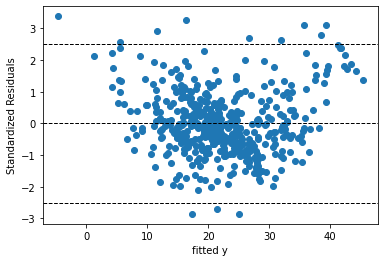

In [28]:
influence = m3.get_influence()
standardized_residuals = influence.resid_studentized_internal

plt.scatter(m3.fittedvalues, standardized_residuals)
plt.xlabel('fitted y')
plt.ylabel('Standardized Residuals')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.axhline(y=2.5, color='black', linestyle='--', linewidth=1)
plt.axhline(y=-2.5, color='black', linestyle='--', linewidth=1)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


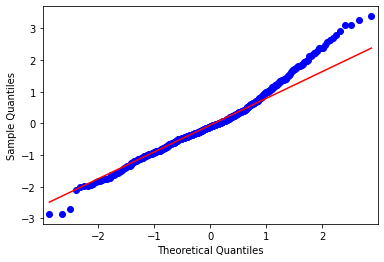

In [29]:
# 정규 qqplot 
sm.qqplot(standardized_residuals, line='q')
plt.show()

- 분산확대인자(VIF) 계산하여 다중공선성 여부 확인 

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.DataFrame({'variable': column, 'VIF': variance_inflation_factor(f3.exog, i)} 
             for i, column in enumerate(f3.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,variable,VIF
0,CRIM,1.769845
1,ZN,2.284160
2,CHAS,1.059119
3,NOX,3.846868
4,RM,2.029507
5,DIS,3.549749
6,RAD,6.702648
7,TAX,7.052875
8,PTRATIO,1.756691
9,B,1.345097


- TAX 제거한 모형 

In [31]:
m4 = smf.ols(formula = 'medv ~ CRIM + ZN + CHAS + NOX + RM + DIS + RAD + PTRATIO + B + LSTAT', data=boston_sub).fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     221.5
Date:                Fri, 29 Jul 2022   Prob (F-statistic):          9.30e-173
Time:                        09:02:04   Log-Likelihood:                -1327.7
No. Observations:                 491   AIC:                             2677.
Df Residuals:                     480   BIC:                             2724.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.6680      4.267      3.672      0.000       7.284      24.052
CRIM          -0.0899      0.025     -3.544      0.000      -0.140      -0.040
ZN             0.0269      0.010      2.600      0.010       0.007       0.047
CHAS           1.9154      0.695      2.756      0.006       0.550       3.281
NOX          -15.1226      2.715     -5.571      0.000     -20.457      -9.789
RM             5.7224      0.357     16.018      0.000       5.020       6.424
DIS           -0.9597      0.148     -6.489      0.000      -1.250      -0.669
RAD            0.0162      0.032      0.506      0.613      -0.047       0.079
PTRATIO       -0.9310      0.100     -9.327      0.000      -1.127      -0.735
B              0.0107      0.002      5.080      0.000       0.007       0.015
LSTAT         -0.3521      0.041     -8.658      0.000      -0.432      -0.272
==============================================================================
Omnibus:                       23.378   Durbin-Watson:                   1.206
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.174
Skew:                           0.474   Prob(JB):                     1.26e-06
Kurtosis:                       3.655   Cond. No.                     1.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- RAD 제거한 모형 

In [ ]:
m5 = smf.ols(formula = 'medv ~ CRIM + ZN + CHAS + NOX + RM + DIS + TAX + PTRATIO + B + LSTAT', data=boston_sub)
m5.fit().summary()